# 三明のノートブック
## 分析内容
視聴時間毎の文末における「草」の頻度分析

## 前処理
### 汎用的なものをimport

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

### データの読み込み

In [2]:
# タコピーのコメントの読み込み
df_comment = pd.read_csv("./data/comments_takopi.csv", header=0, index_col=None, parse_dates=["inserted_at"])

### 時間とコメントのみの分析

In [3]:
# データの切り出し
df_com_time  = df_comment[["inserted_at","message"]].copy()
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
# 日本時間にする
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["message"]].copy()
df_comment_time

#df_com_time.inserted_at = df_com_time.index
# df_com_time.index = df_com_time.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用
# df_comment_time = df_com_time.reset_index(drop=True).copy()

,message
inserted_at,
2021-12-10 00:01:22+09:00,一緒に学校って…友達にみられるかもよ…
2021-12-10 00:01:22+09:00,1コメ
2021-12-10 00:01:25+09:00,すごいのがはじまった！金曜日激戦に。。
2021-12-10 00:01:29+09:00,シンプルに好き
2021-12-10 00:02:13+09:00,面白いけど流石にエグすぎるかも...!
...,...
2022-03-31 19:12:58+09:00,明日更新ないんだな。\n毎週続きが気になってたなぁ。
2022-03-31 19:19:27+09:00,過去の過ちを認めて急に懺悔・謝罪してくる親がリアルすぎる。そんなの親の勝手な自己満足だし、受...
2022-03-31 19:34:35+09:00,"""いじめ・虐待""の部分にフォーカスして読んでた人は、この結末にカタルシスを得られないから「納..."


### 文末が特定のワードのものを抜き出す  
抜き出すワード  
- 草
- w
- 笑

In [4]:
df_only_target = df_comment_time[df_comment_time["message"].str.match('.*(草|w|笑)$')]
df_only_target

,message
inserted_at,
2021-12-10 00:06:05+09:00,可愛いおもえもんで草
2021-12-10 00:13:53+09:00,人のもので死ぬな笑
2021-12-10 00:26:53+09:00,タコピーリベンジャーズwwwww
2021-12-10 00:32:07+09:00,面白い、けど少年というか子供向けじゃないなwww
2021-12-10 00:41:16+09:00,重すぎだろw
...,...
2022-03-31 11:23:00+09:00,この漫画の親はまともな奴おらんのかw
2022-03-31 13:53:30+09:00,あたしイッヌ飼ってるんでメンタルクソほどやられた。まりな、さすがにイッヌを巻き込むのは違くな...
2022-03-31 13:58:59+09:00,東着いてくんのきっしょ！笑笑まりなは永久ほぞーん(*-`ω´-)９ ﾖｯｼｬｧ!!笑笑


## 人がよく「w,草,笑」を文末で使う時間帯の可視化
### 時間帯ごとのデータの切り方の例

In [5]:
hoge = df_only_target.between_time("0:00:00", "6:00:00")
hoge.index = hoge.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用

### 2時間毎にデータの内訳を確認

In [6]:
delimitation = list(range(0,24,2))
delimitation.append(0)
total_arr = []
target_arr = []
rate_arr = []
for i in range(len(delimitation) - 1):
    total_num = df_comment_time.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    target_num = df_only_target.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    total_arr.append(total_num)
    target_arr.append(target_num)
    rate_arr.append(target_num / total_num * 100)
    print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                        delimitation[i+1],
                                                                        rate_arr[-1], 
                                                                        total_num,
                                                                        target_num))

0時 - 2時	| 1.48% 	total: 37220, 	target: 550
2時 - 4時	| 1.43% 	total: 5655, 	target: 81
4時 - 6時	| 1.38% 	total: 2761, 	target: 38
6時 - 8時	| 1.54% 	total: 5581, 	target: 86
8時 - 10時	| 1.28% 	total: 6108, 	target: 78
10時 - 12時	| 1.66% 	total: 4888, 	target: 81
12時 - 14時	| 1.50% 	total: 4735, 	target: 71
14時 - 16時	| 1.91% 	total: 3453, 	target: 66
16時 - 18時	| 1.75% 	total: 3307, 	target: 58
18時 - 20時	| 1.48% 	total: 3313, 	target: 49
20時 - 22時	| 2.03% 	total: 3588, 	target: 73
22時 - 0時	| 1.62% 	total: 3637, 	target: 59


### ヒストグラムの描画
#### 全てのコメント数

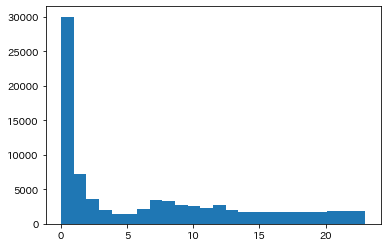

In [7]:
plt.hist(np.asarray(df_comment_time.index.hour), bins=24)
plt.show()

#### 対象となるコメント数

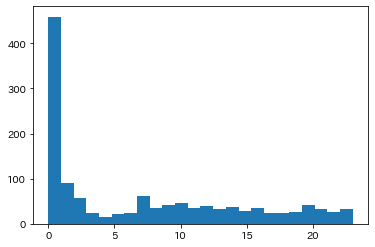

In [8]:
plt.hist(np.asarray(df_only_target.index.hour), bins=24)
plt.show()

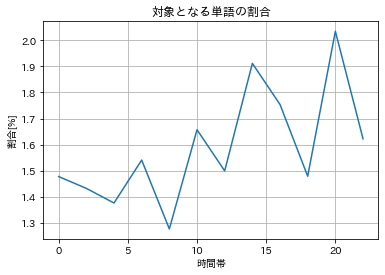

In [9]:
plt.plot(delimitation[:-1], rate_arr)
plt.title("対象となる単語の割合")
plt.xlabel("時間帯") 
plt.ylabel("割合[%]") 
plt.grid(True)